In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: The null hypothesis is that the woman cannot identify, just by tasting, whether milk or tea was added first whereas the alternative hypothesis says that she can. 

Step 2: The test statistic is the number of times she guesses correct out of 8

Step 3: This is a hypergeometric distribution

In [1]:
...

Ellipsis

Step 4: ...

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [2]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null hypothesis is that there is no difference between the mean sepal width of the virginica and the versicolor species whereas the alternative hypothesis is that there is a difference between the two, i.e. virginica has a larger mean sepal width.

Step 2: Test statistic will be the difference between the mean sepal widths of the two species

Step 3: Calculating the p-value

In [3]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [4]:
iris_sub.show(5)

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8


In [7]:
simulations = 10000
num_obs = iris_sub.num_rows
statistics = make_array()
for i in np.arange(simulations):
    sample = iris_sub.with_column('Sample', iris_sub.sample(num_obs, with_replacement = False).column(1))
    statistics = np.append(statistics, np.diff(sample.group(0, np.mean).column(2))[0])
np.mean(statistics)

-0.0005771999999999957

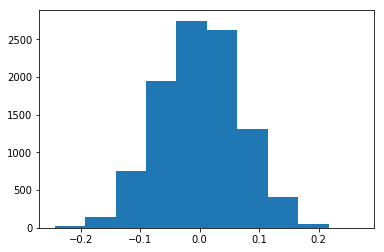

In [8]:
plt.hist(statistics)
plt.show()

Step 4: Using the 5% cutoff, we can see that our p-value is less than 5% and therefore we reject the null hypothesis and that there is no difference between the mean sepal widths of the two species.